In [18]:
%load_ext autoreload
%autoreload 2
import cv2 as cv
from matplotlib.pyplot import imshow
from skimage import io, color
import sys
sys.path.insert(0, "../scripts/trimap_generation/")
from saliency import get_saliency_fine_grained
from PIL import Image
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
image = cv.imread("../images/person.jpg", cv.IMREAD_UNCHANGED)
image2 = Image.open("../images/person.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [35]:
saliency = cv.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(np.array(image2))

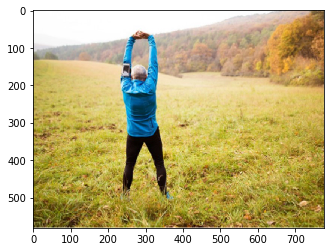

In [32]:
imshow(image)

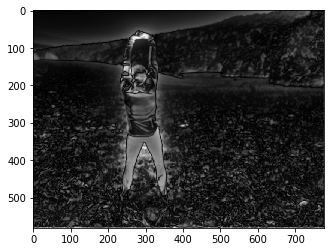

In [49]:
saliencyMap = (saliencyMap * 255).astype("uint8")
# imshow(image)
imshow(saliencyMap, cmap="gray")


In [53]:
saliencyMap.shape

(581, 777)

In [11]:
import numpy as np

In [57]:
def get_saliency_aggressive(image):
    saliency_fine_grained = get_saliency_fine_grained(image)
    new_img = np.empty(saliency_fine_grained.shape).astype(np.float32)
    avg_r = np.average(saliency_fine_grained)
#     avg_g = np.average(saliency_fine_grained[:, :, 1])
#     avg_b = np.average(saliency_fine_grained[:, :, 2])

#     new_img[:, :, 0] = saliency_fine_grained[:, :, 0] - avg_r
#     new_img[:, :, 1] = saliency_fine_grained[:, :, 1] - avg_g
#     new_img[:, :, 2] = saliency_fine_grained[:, :, 2] - avg_b
    
    return np.abs(saliency_fine_grained - np.average(saliency_fine_grained))

In [39]:
image[:, :, 0] -105.10119905989097

array([[ 1.48898801e+02,  1.48898801e+02,  1.48898801e+02, ...,
        -4.11011991e+01, -3.81011991e+01,  6.89880094e+00],
       [ 1.48898801e+02,  1.48898801e+02,  1.48898801e+02, ...,
        -3.91011991e+01, -3.61011991e+01,  8.89880094e+00],
       [ 1.48898801e+02,  1.48898801e+02,  1.48898801e+02, ...,
        -3.41011991e+01, -3.21011991e+01,  9.89880094e+00],
       ...,
       [-7.81011991e+01, -8.81011991e+01, -9.61011991e+01, ...,
        -9.11011991e+01, -8.91011991e+01, -3.91011991e+01],
       [ 1.08988009e+01,  3.89880094e+00, -2.10119906e+00, ...,
        -1.10119906e+00, -1.01199060e-01,  3.08988009e+01],
       [ 1.19898801e+02,  1.13898801e+02,  1.14898801e+02, ...,
         1.13898801e+02,  1.17898801e+02,  1.24898801e+02]])

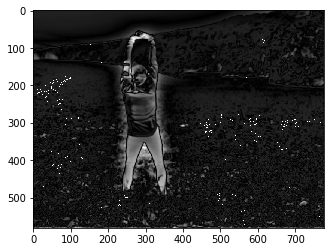

In [58]:
imshow(get_saliency_aggressive(image),cmap="gray")

In [47]:


lab = color.rgb2lab(image)